# Introduction 

For our mini project we have decided to do Airbnb analysis for Selangor and Kuala Lumpur area as both of this area is the most visited place and where the capital city is. Nowadays, we used the word staycation a lot campared to vacation due to Covid-19. When MCO's restricted had been lifted, people were excited as they can go to the nearest Airbnb for staycation. Therefore, this analysis was done to look at the data of Airbnb and do the comparison between the two states.

In [1]:
#import all necessaries packaging
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests
from IPython.display import display
import random
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [2]:
#read data from our cleaned data
data = pd.read_csv("clean_data.csv")
data.head(5)

,Name,Price,Rating,Location,Guest,Bed,Bath,Wifi,Pool,Parking
0,Simfoni 8: Free parking; Wifi & Netflix,94,4.86,Cheras,2,1,1,1,1,0
1,#004 BRITISH FOREST VIEW,90,4.67,Petaling Jaya,4,1,2,1,0,0
2,Simfoni 6 :Nice View; Free Wifi;Parking; Netflix,94,4.92,Cheras,2,1,1,1,1,0
3,"Tamarind Suites 1 Bedroom, Cyberjaya",60,5.00,Cyberjaya,2,1,1,1,1,0
4,Simfoni 16 (2-4pax): Free Wifi & Spacious Balcony,102,4.73,Cheras,4,2,1,1,1,0


In [3]:
#check data types
data.dtypes

Name         object
Price         int64
Rating      float64
Location     object
Guest         int64
Bed           int64
Bath          int64
Wifi          int64
Pool          int64
Parking       int64
dtype: object

In [4]:
#Convert location data type to string data type
data["Location"] = data["Location"].astype("string")

In [5]:
#Recheck the data type
data.dtypes

Name         object
Price         int64
Rating      float64
Location     string
Guest         int64
Bed           int64
Bath          int64
Wifi          int64
Pool          int64
Parking       int64
dtype: object

In [6]:
#Convert name data type to string data type and remove the dataframe
name = data["Name"].astype("string")

def listToString(name): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in name: 
        str1 += ele  
    
    # return string  
    return str1 

titles = listToString(name)

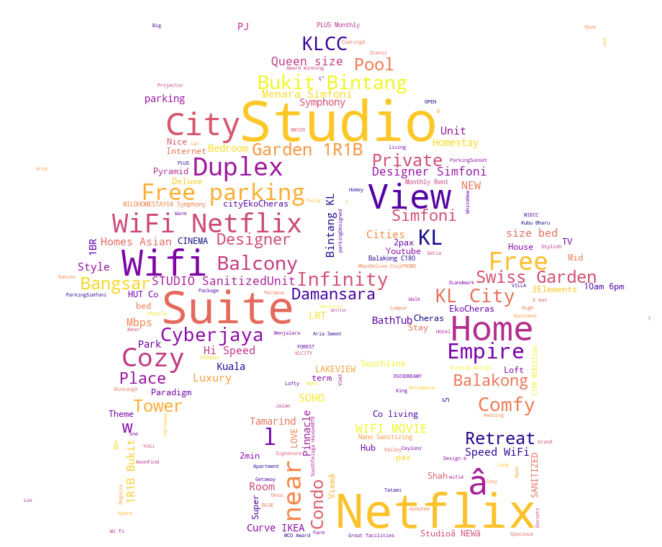

In [7]:
#Use mask to display the word according to the image
mask = np.array(Image.open('homestay.jpg')) 

color= ImageColorGenerator(mask)

word_cloud = WordCloud(width = 480, height = 480, background_color='white', colormap='plasma', mask=mask).generate(titles)
plt.figure(figsize=(9,8),facecolor = 'white')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()   

In [8]:
word_cloud.to_file('airbnb_wordcloud.png')

The word Studio, Suite, and Netflix was emphasized in the names of Airbnb. We can make assumption here, most of Airbnb is a studio type or a suite type and have Netflix accessed. 

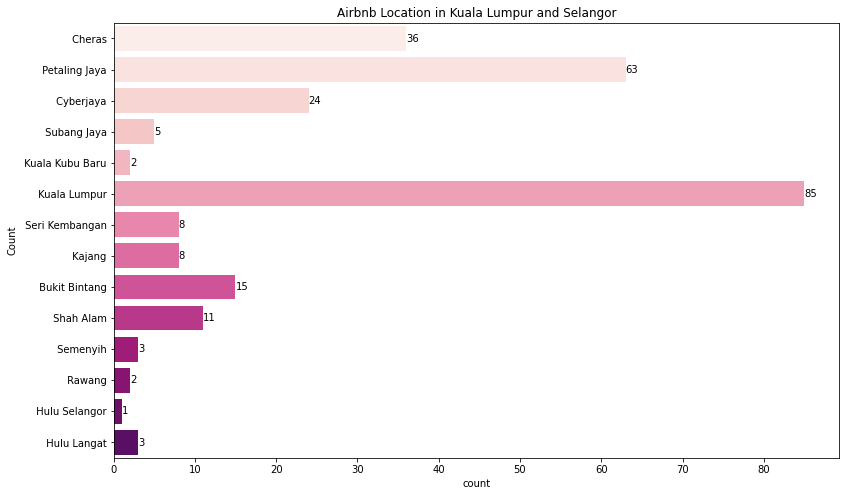

In [25]:
plt.figure(figsize = (13,8))
ax = sns.countplot(y="Location", palette= "RdPu", data=data)
ax.set_ylabel('Count')
ax.set_title('Airbnb Location in Kuala Lumpur and Selangor')
for container in ax.containers:
    ax.bar_label(container)

From the graph above, Kuala Lumpur has the highest number of frequency, however, we can also see there are Bukit Bintang and Cheras which is part of Kuala Lumpur but it was separated in different column.

Text(0.5, 1.0, 'Price of Airbnb based on Location')

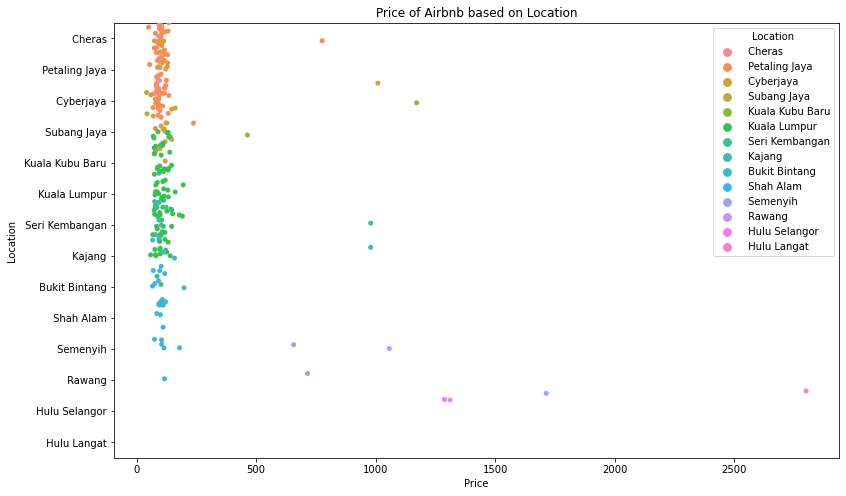

In [22]:
#Plot the graph to compare the price with location
plt.figure(figsize = (13,8))
ax = sns.stripplot(x="Price", y="Location", data=data, jitter=2.0, hue="Location")
ax.set_title('Price of Airbnb based on Location')

From the graph above, we can see more than half of the AirBnb price is lower than RM 500 and there are some of Airbnb cost more than RM 1000, and the mavimum price is near to RM 3000

In [11]:
#Divide the price into price range and assigned into a new column
price_range = []

for x in data["Price"]:
        if x <=200:
            price_range.append('0-200')
        elif 200< x <=400:
            price_range.append('201-400')
        elif 400< x <=600:
            price_range.append('401-600')
        elif 600< x <=800:
            price_range.append('601-800')
        elif 800< x <=1000:
            price_range.append('801-1000')
        else:
            price_range.append('More than 1000')
data["Price_Range"] = price_range
data.head(10)

,Name,Price,Rating,Location,Guest,Bed,Bath,Wifi,Pool,Parking,Price_Range
0,Simfoni 8: Free parking; Wifi & Netflix,94,4.86,Cheras,2,1,1,1,1,0,0-200
1,#004 BRITISH FOREST VIEW,90,4.67,Petaling Jaya,4,1,2,1,0,0,0-200
2,Simfoni 6 :Nice View; Free Wifi;Parking; Netflix,94,4.92,Cheras,2,1,1,1,1,0,0-200
3,"Tamarind Suites 1 Bedroom, Cyberjaya",60,5.00,Cyberjaya,2,1,1,1,1,0,0-200
4,Simfoni 16 (2-4pax): Free Wifi & Spacious Balcony,102,4.73,Cheras,4,2,1,1,1,0,0-200
5,#2 Hut Co-living | Single Bed | 100 Mbps WiFi,44,4.57,Subang Jaya,1,1,1,1,1,0,0-200
6,"LE MEILLEUR (WIFI, NETFLIX, KITCHEN, SANITIZEU...",98,4.76,Petaling Jaya,4,1,1,1,0,0,0-200
7,1 Super King Bed / Netflix / Bathtub @ Pinnacl...,120,5.00,Petaling Jaya,2,1,1,0,0,0,0-200
8,Cosy Duplex near The Curve & IKEA Damansara,82,4.69,Petaling Jaya,2,1,1,1,0,0,0-200
9,"JIMMAE STUDIO (SanitizedUnit)(Netflix,Wifi&Movie)",80,4.63,Petaling Jaya,5,1,1,1,0,0,0-200


In [12]:
#check the data type
data.dtypes

Name            object
Price            int64
Rating         float64
Location        string
Guest            int64
Bed              int64
Bath             int64
Wifi             int64
Pool             int64
Parking          int64
Price_Range     object
dtype: object

In [13]:
#Change price_range data type to category. This was done to make sure the price range is automatically sorted
data.Price_Range=data.Price_Range.astype('category')
data.dtypes

Name             object
Price             int64
Rating          float64
Location         string
Guest             int64
Bed               int64
Bath              int64
Wifi              int64
Pool              int64
Parking           int64
Price_Range    category
dtype: object

In [14]:
#Use crosstab to get the numbers of Airbnb that has pool according to the price range
percent_pool = pd.crosstab(data.loc[:, "Price_Range"], 
                             data.loc[:, "Pool"])
percent_pool

Pool,0,1
Price_Range,,
0-200,64,186
201-400,1,0
401-600,1,1
601-800,0,3
801-1000,0,2
More than 1000,1,7


In [15]:
#Chane to percentage
percent_pool = pd.crosstab(data.loc[:, "Price_Range"], 
               data.loc[:, "Pool"], 
               normalize = "index") * 100 #Normalized by index so that all rows equals to 100
percent_pool

Pool,0,1
Price_Range,,
0-200,25.6,74.4
201-400,100.0,0.0
401-600,50.0,50.0
601-800,0.0,100.0
801-1000,0.0,100.0
More than 1000,12.5,87.5


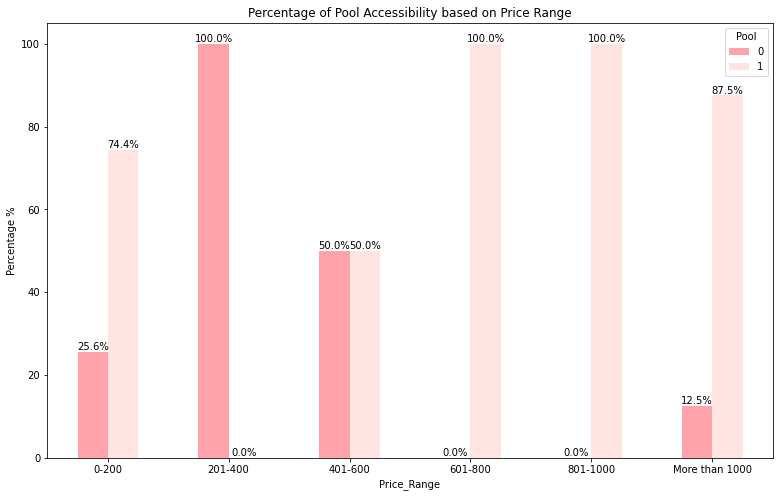

In [34]:
c = ["#FEA3AA","#FFE4E1"]
ax = percent_pool.plot(kind='bar', stacked=False, rot=0, color= c, figsize=(13, 8)) 
ax.set_ylabel('Percentage %')
ax.set_title('Percentage of Pool Accessibility based on Price Range')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f%%')                 

We used percentage to display this graph as the number of Airbnb in the price range is not the same. From the graph we can see most of the Airbnb with higher price range starting RM 600 and above has pool access for at least 80% of each of the price range. Meanwhile, for the lower price range we can see that most of it has no pool access. 

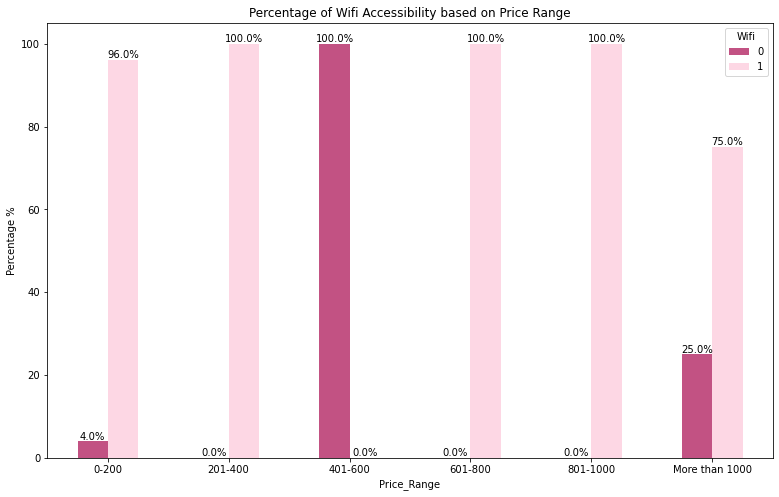

In [35]:
#Repeat the same step for wifi access
percent_wifi = pd.crosstab(data.loc[:, "Price_Range"], 
               data.loc[:, "Wifi"], 
               normalize = "index") * 100 #Normalized by index so that all rows equals to 100
c = ["#C25283","#FDD7E4"]
ax = percent_wifi.plot(kind='bar', stacked=False, rot=0, color= c, figsize=(13, 8)) 
ax.set_ylabel('Percentage %')
ax.set_title('Percentage of Wifi Accessibility based on Price Range')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f%%')

From the graph above, it is safe for us to assume that most of Airbnb provides Wifi access. It is alo quite interesting to see that 25% of Airbnb from price range more that 1000 do not provide Wifi access

Text(0.5, 1.0, 'Number of guest based on Price Range')

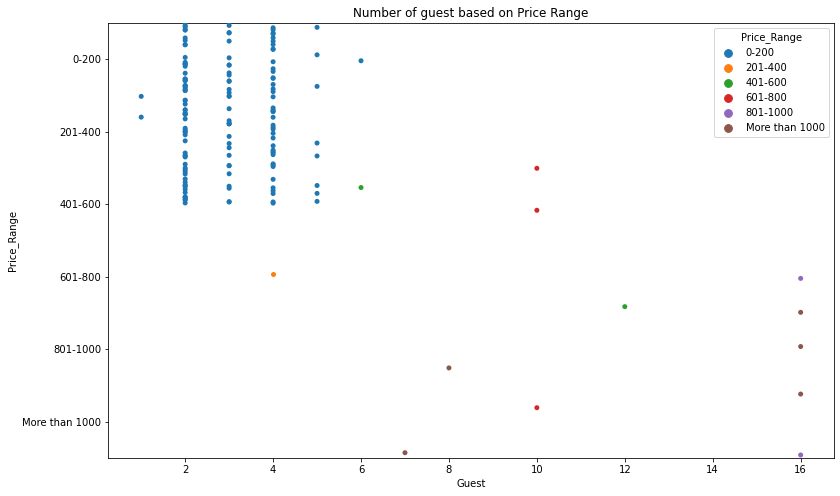

In [18]:
plt.figure(figsize = (13,8))
ax = sns.stripplot(x="Guest", y="Price_Range", data=data, jitter=2.0, hue="Price_Range")
ax.set_title('Number of guest based on Price Range')

This graph shows that most of the guest number for Airbnb is in range of 2 guest to 4 guest. This is expected as most of Airbnb type is Studio as highlited in the wordcloud. We also can see that for price range starting from RM 600 the guest number is higher and the maximum guest number here is 16 guests.

In [19]:
#divide location into Kuala Lumpur and Selangor and assigned it to a new column
data["State"] = np.where(data['Location'].str.contains('Cheras|Kuala Lumpur|Bukit Bintang'),'Kuala Lumpur','Selangor')
data.head(10)

,Name,Price,Rating,Location,Guest,Bed,Bath,Wifi,Pool,Parking,Price_Range,State
0,Simfoni 8: Free parking; Wifi & Netflix,94,4.86,Cheras,2,1,1,1,1,0,0-200,Kuala Lumpur
1,#004 BRITISH FOREST VIEW,90,4.67,Petaling Jaya,4,1,2,1,0,0,0-200,Selangor
2,Simfoni 6 :Nice View; Free Wifi;Parking; Netflix,94,4.92,Cheras,2,1,1,1,1,0,0-200,Kuala Lumpur
3,"Tamarind Suites 1 Bedroom, Cyberjaya",60,5.00,Cyberjaya,2,1,1,1,1,0,0-200,Selangor
4,Simfoni 16 (2-4pax): Free Wifi & Spacious Balcony,102,4.73,Cheras,4,2,1,1,1,0,0-200,Kuala Lumpur
5,#2 Hut Co-living | Single Bed | 100 Mbps WiFi,44,4.57,Subang Jaya,1,1,1,1,1,0,0-200,Selangor
6,"LE MEILLEUR (WIFI, NETFLIX, KITCHEN, SANITIZEU...",98,4.76,Petaling Jaya,4,1,1,1,0,0,0-200,Selangor
7,1 Super King Bed / Netflix / Bathtub @ Pinnacl...,120,5.00,Petaling Jaya,2,1,1,0,0,0,0-200,Selangor
8,Cosy Duplex near The Curve & IKEA Damansara,82,4.69,Petaling Jaya,2,1,1,1,0,0,0-200,Selangor
9,"JIMMAE STUDIO (SanitizedUnit)(Netflix,Wifi&Movie)",80,4.63,Petaling Jaya,5,1,1,1,0,0,0-200,Selangor


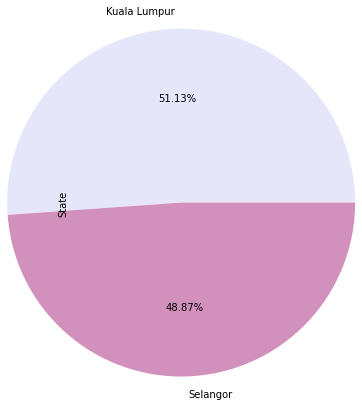

In [20]:
#Display the percentage of Airbnb between two states
color = ("#E6E6FA","#D291BC")
radius=1.8 * 100
ax = data.State.groupby(data['State']).size().plot(kind='pie',colors=color, radius = 2.0, autopct='%.2f%%')

The pie chart shows, after separated all the locations according to the two states, Kuala Lumpur still has the highest percentage of Airbnb

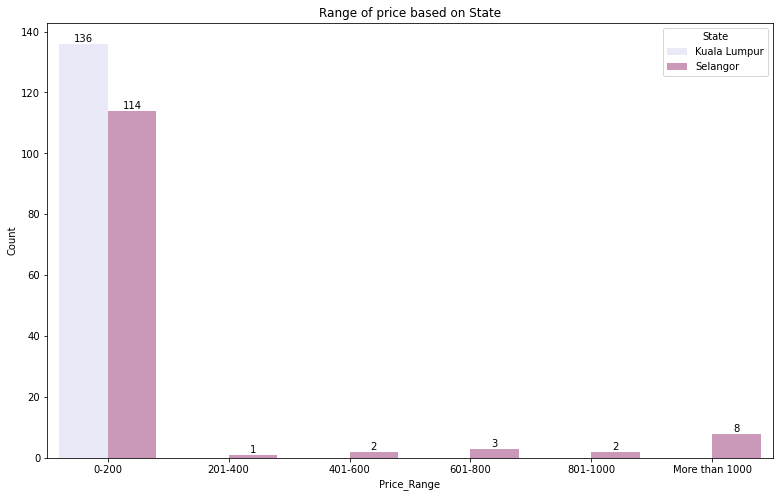

In [36]:
#Compare the price range with state
color = ("#E6E6FA","#D291BC")
plt.figure(figsize = (13,8))
ax = sns.countplot(x="Price_Range",hue = "State", palette=color, data=data)
ax.set_ylabel('Count')
ax.set_title('Range of price based on State')
for container in ax.containers:
    ax.bar_label(container)

Now, lastly we want to compare the price range of Airbnb between Selangor and kuala Lumpur. It's very clear that the price of Airbnb is in Selangor is expensive compared to Kuala Lumpur. And we can conclude from analysis before, that most of Airbnb in Selangor is a villa type with larger capasity for guest unlike Airbnb in Kuala Lumpur which is mostly Studio or apartment type with lower guest capasity.